Inputting and processing flowrate data

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

plt.style.use('default')

# reading the csv file and creating the dataframe
flowrate_2018_filename = "Data/Flowrate_data_3yp - SuttCourt 2018 Flow.csv"
flowrate_2019_filename = "Data/Flowrate_data_3yp - SuttCourt 2019 Flow.csv"
 
flowrate_18_df = pd.read_csv(flowrate_2018_filename)
flowrate_19_df = pd.read_csv(flowrate_2019_filename)
 
# removing the rows with ";spurious data removed"
flowrate_18_df = flowrate_18_df[flowrate_18_df['Time stamp'] != ';spurious data removed']
flowrate_19_df = flowrate_19_df[flowrate_19_df['Time stamp'] != ';spurious data removed']
 
# remove the rows with '---'
flowrate_18_df = flowrate_18_df[flowrate_18_df['Value[m³/s]'] != '---']
flowrate_19_df = flowrate_19_df[flowrate_19_df['Value[m³/s]'] != '---']
 
# remove the rows with 0 flowrate
flowrate_18_df = flowrate_18_df[flowrate_18_df['Value[m³/s]'] != '0']
flowrate_19_df = flowrate_19_df[flowrate_19_df['Value[m³/s]'] != '0']

# changing the data types of the time and value columns
flowrate_18_df['Time stamp'] = pd.to_datetime(flowrate_18_df['Time stamp'])
flowrate_18_df['Value[m³/s]'] = pd.to_numeric(flowrate_18_df['Value[m³/s]'])
 
flowrate_19_df['Time stamp'] = pd.to_datetime(flowrate_19_df['Time stamp'])
flowrate_19_df['Value[m³/s]'] = pd.to_numeric(flowrate_19_df['Value[m³/s]'])



In [3]:
flowrate_18_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34582 entries, 0 to 36480
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time stamp      33322 non-null  datetime64[ns]
 1   Value[m³/s]     33322 non-null  float64       
 2   State of value  33322 non-null  object        
 3   Interpolation   33322 non-null  float64       
 4   Tags            0 non-null      float64       
 5   Comments        11266 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.8+ MB


In [4]:
flowrate_18_df.describe()

,Value[m³/s],Interpolation,Tags
count,33322.000000,33322.0,0.0
mean,28.206426,102.0,NaN
std,28.311196,0.0,NaN
min,1.080000,102.0,NaN
25%,5.310000,102.0,NaN
50%,17.500000,102.0,NaN
75%,43.300000,102.0,NaN
max,133.000000,102.0,NaN


In [5]:
flowrate_18_df['Value[m³/s]'].values

array([84.9, 84.9, 84.4, ..., 26.7, 26.7, 26.8])

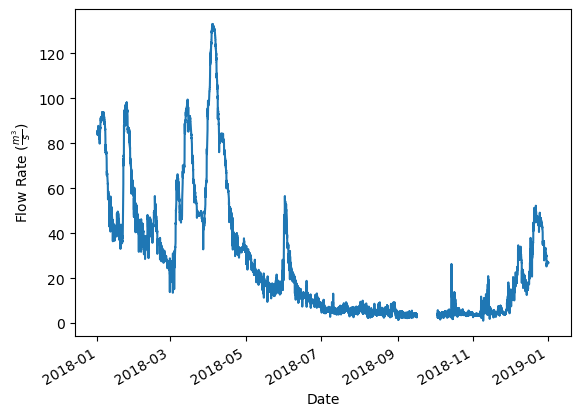

In [6]:
fig, ax = plt.subplots()

plt.plot(flowrate_18_df['Time stamp'],flowrate_18_df['Value[m³/s]'])
plt.xlabel('Date')
plt.ylabel(r'Flow Rate $(\frac{m^3}{s})$')

fig.autofmt_xdate()


pandas insert missing dates dataframe 

pandas how to find rows with nans in it 

Last entry before gap 2018-09-16 12:45:00:000 index 24819 

First entry after gap 2018-10-03 10:30:00:000 index 27883

index 27420 is a 0 flow rate 


In [7]:
# we can extract dates between A and B by using something called a 'mask'
# we basically create a list of [True True False..... True False]
# then we can extract those rows which are 'True' from the DataFrame
 
mask_start_date = pd.to_datetime('2018-10-01')        # YYYY-MM-DD
mask_end_date = pd.to_datetime('2018-11-01')          # YYYY-MM-DD
 
# form the 'mask' - the list of True and False
mask = (flowrate_18_df['Time stamp'] >= mask_start_date) & (flowrate_18_df['Time stamp'] <= mask_end_date)
 
# extract the required rows
flowrate_18_October_df = flowrate_18_df.loc[mask]

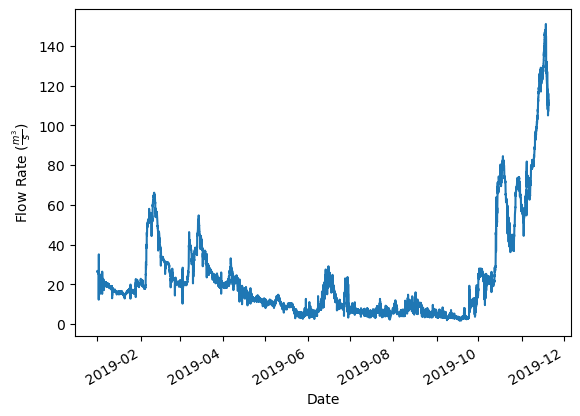

In [8]:
fig, ax = plt.subplots()

plt.plot(flowrate_19_df['Time stamp'],flowrate_19_df['Value[m³/s]'])
plt.xlabel('Date')
plt.ylabel(r'Flow Rate $(\frac{m^3}{s})$')

for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

fig.autofmt_xdate()

Creating a flow duration curve 



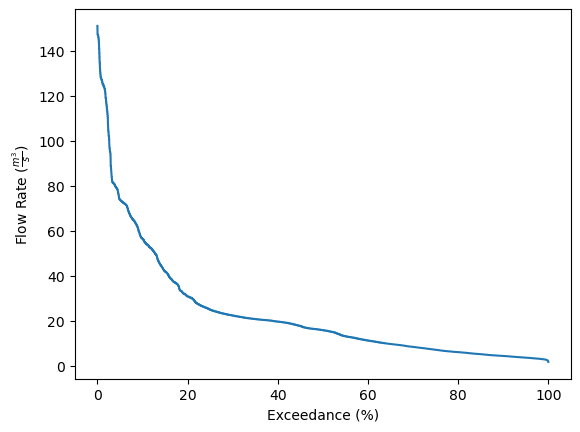

In [9]:
flowrate_19_sorted = np.sort(flowrate_19_df['Value[m³/s]'])[::-1]
exceedence = np.arange(1.,len(flowrate_19_sorted)+1) / len(flowrate_19_sorted)

plt.plot(exceedence*100, flowrate_19_sorted)
plt.xlabel("Exceedance (%)")
plt.ylabel(r'Flow Rate $(\frac{m^3}{s})$')
plt.show()

In [10]:
#find the index for which a set exceedence level is met
exceedence_level = np.argmax(exceedence>0.95)

#find flowrate corresponding to this exceedence level
flowrate_19_exceedence = flowrate_19_sorted[exceedence_level]
print(flowrate_19_exceedence)

3.61


Now want to combine the two years of data we have and produced a combined FDC


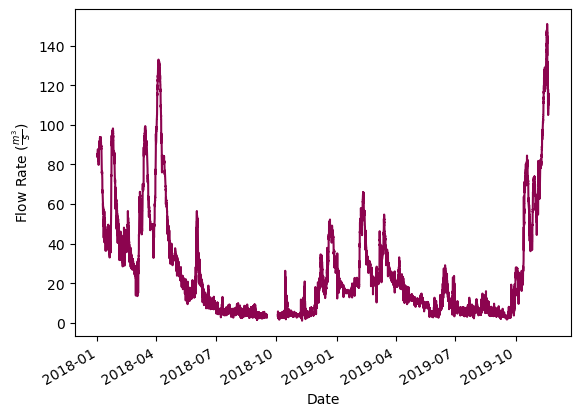

In [11]:
frames = [flowrate_18_df, flowrate_19_df]
flowrate_combined_df = pd.concat(frames)

fig, ax = plt.subplots()

plt.plot(flowrate_combined_df['Time stamp'],flowrate_combined_df['Value[m³/s]'],'#8c044F')
plt.xlabel('Date')
plt.ylabel(r'Flow Rate $(\frac{m^3}{s})$')

fig.autofmt_xdate()




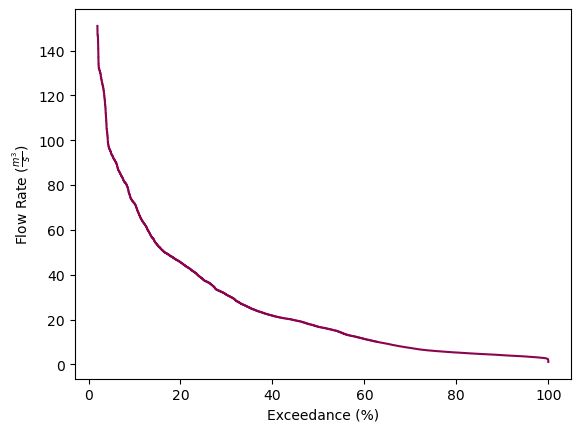

In [18]:
flowrate_combined_sorted = np.sort(flowrate_combined_df['Value[m³/s]'])[::-1]
exceedance = np.arange(1.,len(flowrate_combined_sorted)+1) / len(flowrate_combined_sorted)

plt.plot(exceedance*100, flowrate_combined_sorted, '#8c044F')
plt.xlabel("Exceedance (%)")
plt.ylabel(r'Flow Rate $(\frac{m^3}{s})$')
plt.show()

In [14]:
#find the index for which a set exceedence level is met
exceedance_level = np.argmax(exceedance>0.95)

#find flowrate corresponding to this exceedence level
flowrate_combined_exceedance = flowrate_combined_sorted[exceedance_level]
print(flowrate_combined_exceedance)

3.51


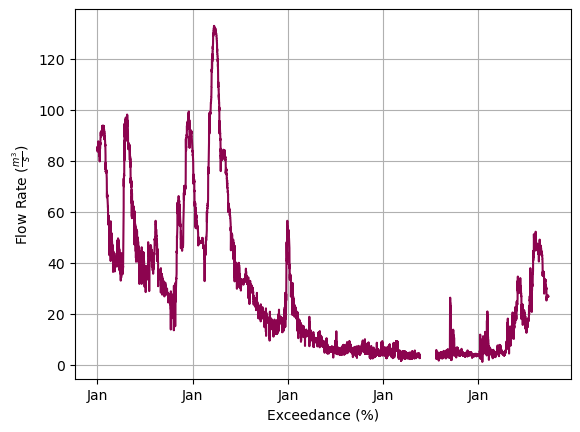

In [15]:
# Using a different style of plot 

plt.style.use('default')                    # style of plot 
fig, ax = plt.subplots()   

#create datatime array to be x-axis ~ here the freq is set as D for days 
x_axis = pd.date_range(start='01/01/2020', periods = 34582, freq= 'D')  

# choose the format you want the labels on x-axis to appea r as. Here %b gives abbrev month names
myFmt = mdates.DateFormatter('%b')          # format chosen 
ax.xaxis.set_major_formatter(myFmt)        # the chosen format applied to the axis 

ax.plot(x_axis,flowrate_18_df['Value[m³/s]'], '#8c044F')      # actual PLOT command ~ x-axis array must be same length as daily_mean

# axis labels 
ax.set_xlabel('Exceedance (%)')
ax.set_ylabel(r'Flow Rate $(\frac{m^3}{s})$')

# ax.xaxis.label.set_size(30)
# ax.yaxis.label.set_size(30)
# ax.title.set_size(30)

# set size of numbers on axis 
# ax.tick_params(axis='both', which='major', labelsize=30)   
ax.grid(b=True)